# Data was used from the BSRN Linderber Observatory 2015-2016. First are the codes that were used to clean the data & in the end is the code for creating an LSTM neural network.

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Flatten
import pandas as pd
from statistics import mean
import numpy
import keras
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics
import sklearn
import seaborn.apionly as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Merge all datasets & Presprocessing

## Do for 2015 & 2016 data:

## Fix Radiosonde dataset

In [ ]:
radiation = pd.read_csv("RadiationMeasures2016.csv")
cloud = pd.read_csv("Cloud10minMeasures2016.csv")
radiosonde = pd.read_csv("RadiosondeSecMeasures2016.csv")
metro = pd.read_csv("Metro60minMeasures2016.csv")
Ozone = pd.read_csv("OzoneDayMeasures2016.csv")
radiosonde=radiosonde.drop('hours',1)
def setHours(date1, date2, date3, date4, dataset):
    df1=radiosonde[dataset['Date/Time']==date1]
    df2=radiosonde[dataset['Date/Time']==date2]
    df3=radiosonde[dataset['Date/Time']==date3]
    df4=radiosonde[dataset['Date/Time']==date4]
    dfs=[df1, df2, df3, df4]
    count=1;
    for df in dfs:
        value = int((len(df)-2)/6)
        df=df.iloc[1:]
        df=df[:-1]
        df=df['Date/Time']
        hours =df.iloc[::value]
        hours = hours.iloc[1:]
        print(hours)
        if count == 1:
            r=1
        elif count == 2:
            r=7
        elif count == 3:
            r=13
        elif count == 4:
            r=19
        idx =[0,1,2,3,4]
        for x in idx:
            if count == 1:
                date=date1
            elif count == 2:
                date=date2
            elif count == 3:
                date=date3
            elif count == 4:
                date=date4
            if r < 10:
                date = date[:-7] + str(r) + ':00:00'
            else:
                date = date[:-8] + str(r) + ':00:00'
            hours.iloc[x]=date
            r+=1
            print(date)
        radiosonde.loc[hours.index,'Date/Time'] = hours
        count +=1
        
radiosonde = pd.read_csv("RadiosondeSecMeasures2016.csv")
longmonths=['01','03','05','07','08','10','12']
shortmonths=['04','06','09','11']
feb=2
year='2016'
times=['00:00:00', '06:00:00', '12:00:00', '18:00:00']
counter=0
dates=[]
for month in longmonths:
    for day in range(1, 32):
        for time in times:
            if day < 10:
                date = year+'-'+month+'-'+'0'+str(day)+' '+time
            else:  
                date = year+'-'+month+'-'+str(day)+' '+time
            dates.append(date)
            if counter == 3:
                date1 = str(dates[0])
                date2 = str(dates[1])
                date3 = str(dates[2])
                date4 = str(dates[3])
                print(dates[0])
                print(dates[1])
                print(dates[2])
                print(dates[3])
                print('end')
                setHours(date1, date2, date3, date4, radiosonde)
                dates=[]
                counter=0
            else: counter +=1
for month in shortmonths:
    for day in range(1, 31):
        for time in times:
            if day < 10:
                date = year+'-'+month+'-'+'0'+str(day)+' '+time
            else:  
                date = year+'-'+month+'-'+str(day)+' '+time
            dates.append(date)
            if counter == 3:
                date1 = str(dates[0])
                date2 = str(dates[1])
                date3 = str(dates[2])
                date4 = str(dates[3])
                print(dates[0])
                print(dates[1])
                print(dates[2])
                print(dates[3])
                print('end')
                setHours(date1, date2, date3, date4, radiosonde)
                dates=[]
                counter=0
            else: counter +=1
month='02'
year='2016'
times=['00:00:00', '06:00:00', '12:00:00', '18:00:00']

for day in range(1, 30):
        for time in times:
            if day < 10:
                date = year+'-'+month+'-'+'0'+str(day)+' '+time
            else:  
                date = year+'-'+month+'-'+str(day)+' '+time
            dates.append(date)
            if counter == 3:
                date1 = str(dates[0])
                date2 = str(dates[1])
                date3 = str(dates[2])
                date4 = str(dates[3])
                print(dates[0])
                print(dates[1])
                print(dates[2])
                print(dates[3])
                print('end')
                setHours(date1, date2, date3, date4, radiosonde)
                dates=[]
                counter=0
            else: counter +=1
set(radiosonde['Date/Time'])
radiosonde.to_csv('RadiosondeHourlyTransformed.csv', encoding='utf-8', index=False)

In [ ]:
radiosonde2 = pd.read_csv("RadiosondeHourlyTransformed.csv")
def setMinutes(date, pdate, dataset):
    df=radiosonde2[radiosonde2['Date/Time']==pdate]
    df2=radiosonde2[radiosonde2['Date/Time']==date]
    idxs=[]
    idx = df.index.values[0]
    while idx < df2.index.values[0]:
        idxs.append(idx)
        idx +=1
    df3 = radiosonde2.loc[idxs] # just need to remove the first one
    value = int((len(df3)-1)/60) #minus 1 (first one)
    df3=df3.iloc[1:]
    #df=df[:-1]#remove last: not here because last value is the complete hour which is not in here
    df3=df3['Date/Time']
    minutes =df3.iloc[::value]
    minutes = minutes.iloc[1:]
    print(minutes)
    r=1
    x=0
    while r < 60:
        if r < 10:
            pdate = pdate[:-4]+str(r)+':00'
        else:
            pdate = pdate[:-5]+str(r)+':00'
        minutes.iloc[x]=pdate
        r+=1
        x+=1
        print(pdate)
    radiosonde2.loc[minutes.index,'Date/Time'] = minutes
longmonths1=['01','03','05','07','08','10','12']
year='2016'
alldates = []   
for month in longmonths1:
    for day in range(1, 32):
        for time in range(0, 24):
            if day < 10:
                if time < 10:
                    date = year+'-'+month+'-'+'0'+str(day)+' '+'0'+str(time)+':00:00'
                else:
                    date = year+'-'+month+'-'+'0'+str(day)+' '+str(time)+':00:00'
            else:  
                if time < 10:
                    date = year+'-'+month+'-'+str(day)+' '+'0'+str(time)+':00:00'
                else:
                    date = year+'-'+month+'-'+str(day)+' '+str(time)+':00:00'
            alldates.append(date)
            if len(alldates) > 1:
                pdate = alldates[-2]#take the last value in there
                setMinutes(date, pdate, radiosonde2) #pass the date of every different hour with the dataset, and previous date
year='2016'
alldates = []
shortmonths1=['04','06','09','11']
for month in shortmonths1:
    for day in range(1, 31):
        for time in range(0, 24):
            if day < 10:
                if time < 10:
                    date = year+'-'+month+'-'+'0'+str(day)+' '+'0'+str(time)+':00:00'
                else:
                    date = year+'-'+month+'-'+'0'+str(day)+' '+str(time)+':00:00'
            else:  
                if time < 10:
                    date = year+'-'+month+'-'+str(day)+' '+'0'+str(time)+':00:00'
                else:
                    date = year+'-'+month+'-'+str(day)+' '+str(time)+':00:00'
            alldates.append(date)
            if len(alldates) > 1:
                pdate = alldates[-2]#take the last value in there
                setMinutes(date, pdate, radiosonde2) #pass the date of every different hour with the dataset, and previous date
year='2016'
alldates = []
month = '02'
for day in range(1, 30):
    for time in range(0, 24):
        if day < 10:
            if time < 10:
                date = year+'-'+month+'-'+'0'+str(day)+' '+'0'+str(time)+':00:00'
            else:
                date = year+'-'+month+'-'+'0'+str(day)+' '+str(time)+':00:00'
        else:  
            if time < 10:
                date = year+'-'+month+'-'+str(day)+' '+'0'+str(time)+':00:00'
            else:
                date = year+'-'+month+'-'+str(day)+' '+str(time)+':00:00'
        alldates.append(date)
        if len(alldates) > 1:
            pdate = alldates[-2]#take the last value in there
            print(pdate)
            setMinutes(date, pdate, radiosonde2) #pass the date of every different hour with the dataset, and previous date
radiosonde2.to_csv('RadiosondeMinutelyTransformed.csv', encoding='utf-8', index=False)
radiosonde3 = pd.read_csv('RadiosondeMinutelyTransformed.csv')
longmonths=['01','03','05','07','08','10','12']
shortmonths=['04','06','09','11']
year='2016'
times=['00:00:00', '06:00:00', '12:00:00', '18:00:00']
#for month in longmonths:
month = '01'
for day in range(1, 32):
    for time in times:
        if day < 10:
            date = year+'-'+month+'-'+'0'+str(day)+' '+time 
        else:  
            date = year+'-'+month+'-'+str(day)+' '+time
        # result up till here is the dates for all days
        df=radiosonde3[radiosonde3['Date/Time']==date].index[1:]
        radiosonde4 = radiosonde3.drop(df, inplace=True)
        #store radiosonde 4 and use it again
#create hourly column
radiosondefinal["hours"] = radiosondefinal['Date/Time'].dt.hour
radiosondefinal.to_csv('RadiosondeMinutelyFinal.csv', encoding='utf-8', index=False)

## Merge the datasets

In [ ]:
radiation = pd.read_csv("RadiationMeasures2016.csv")
cloud = pd.read_csv("Cloud10minMeasures2016.csv")
radiosonde = pd.read_csv('RadiosondeMinFinal.csv')
metro = pd.read_csv("Metro60minMeasures2016.csv")
Ozone = pd.read_csv("OzoneDayMeasures2016.csv")
cloud=cloud.drop('Station',1)
cloud=cloud.drop('Longitude',1)
cloud=cloud.drop('Latitude',1)
cloud=cloud.drop('hours',1)
cloud=cloud.drop('days',1)
cloud=cloud.drop('Months',1)
cloud.set_index('Date/Time', inplace=True)
cloud=cloud.reindex(radiation['Date/Time'])
cloud.head()
radiosonde=radiosonde.drop('Ozone [mPa]',1)
radiosonde.set_index('Date/Time', inplace=True)
radiosonde=radiosonde.reindex(radiation['Date/Time'])
radiosonde.head()
metro=metro.drop('Station',1)
metro=metro.drop('Longitude',1)
metro=metro.drop('Latitude',1)
metro=metro.drop('hours',1)
metro=metro.drop('days',1)
metro=metro.drop('Months',1)
metro.set_index('Date/Time', inplace=True)
metro=metro.reindex(radiation['Date/Time'])
metro.head()
Ozone=Ozone.drop('Station',1)
Ozone=Ozone.drop('Longitude',1)
Ozone=Ozone.drop('Latitude',1)
Ozone=Ozone.drop('hours',1)
Ozone=Ozone.drop('days',1)
Ozone=Ozone.drop('Months',1)
Ozone.set_index('Date/Time', inplace=True)
Ozone=Ozone.reindex(radiation['Date/Time'])
Ozone.head()
radiation.set_index('Date/Time', inplace=True)
OneBigDataSet=pd.concat([radiation, cloud, radiosonde, metro, Ozone], axis=1)
OneBigDataSet.to_csv('OneBigDataSet.csv', encoding='utf-8', index=False)

## Full linear interpolation

In [ ]:
df = pd.read_csv("OneBigDataSet.csv")
df2 = pd.read_csv("RadiationMeasures2016.csv")
date = df2['Date/Time']
df['Date']=date
df['Date'] = pd.to_datetime(df['Date'])
df.shape
df=df.drop('Latitude', 1)
df=df.drop('Longitude', 1)
df=df.drop('Direct radiation [W/m**2]', 1)
df=df.drop('Diffuse radiation [W/m**2]', 1)
df=df.drop('Long-wave downward radiation [W/m**2]',1)
df=df.drop('YYGG9 IIiii Nddff 1SnTTT 2SnTdTdTd 3P0P0P0 4PPPP 7wwW1W2 8NhClCmCh 333 8NsChshs 8NsChshs 8NsChshs',1)
lineardf = df.interpolate(method='linear')
lineardf=lineardf.drop('Ozone total [DU]',1)
lineardf.to_csv('linearInterpolateddf.csv', encoding='utf-8', index=False)

## Merge 2015 & 2016 data

In [ ]:
df1 = pd.read_csv('linearInterpolateddf.csv')
df2 = pd.read_csv('linearInterpolateddf2015.csv')
df1 = df1.drop([ 'hours','days','Months'],1)
df2=df2.drop([ 'hours','days'],1)
df=pd.concat([df2,df1])
df.to_csv('linearInterpolateddf20152016.csv', encoding='utf-8', index=False)

In [ ]:
df = pd.read_csv('linearInterpolateddf20152016.csv')
df['Date'] =  pd.to_datetime(df['Date'])
df['Week_Number'] = df['Date'].dt.week
df['Month_Number'] = df['Date'].dt.month
df['Day_Number'] = df['Date'].dt.day
df['Hour_Number'] = df['Date'].dt.hour
df['Year_Number']=df['Date'].dt.year
#set date to index
df.set_index('Date', inplace=True)
df.head(5)
df.to_csv('RNNtry.csv')

# Create Heatmaps

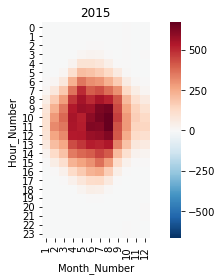

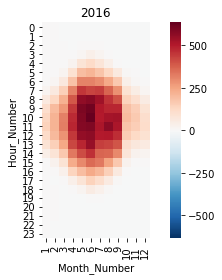

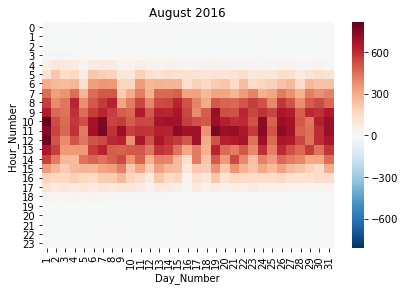

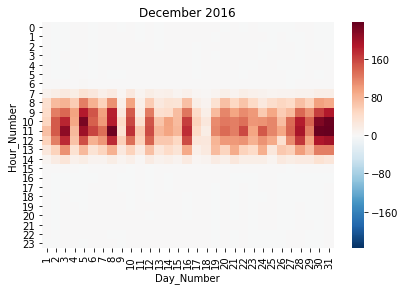

In [4]:
dataset = pd.read_csv('RNNtry.csv', header=0, index_col=0)
dataset2015 = dataset[dataset['Year_Number']==2015]
dataset2016 = dataset[dataset['Year_Number']==2016]
datasetaug2016 = dataset[dataset['Month_Number']==8]
datasetdec2016 = dataset[dataset['Month_Number']==12]
piv = pd.pivot_table(dataset2015, values="Short-wave downward (GLOBAL) radiation [W/m**2]",index=["Hour_Number"], columns=["Month_Number"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.title('2015')
plt.tight_layout()
plt.show()
piv = pd.pivot_table(dataset2016, values="Short-wave downward (GLOBAL) radiation [W/m**2]",index=["Hour_Number"], columns=["Month_Number"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.title('2016')
plt.tight_layout()
plt.show()
piv = pd.pivot_table(datasetaug2016, values="Short-wave downward (GLOBAL) radiation [W/m**2]",index=["Hour_Number"], columns=["Day_Number"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.title('August 2016')
plt.tight_layout()
plt.show()
piv = pd.pivot_table(datasetdec2016, values="Short-wave downward (GLOBAL) radiation [W/m**2]",index=["Hour_Number"], columns=["Day_Number"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.title('December 2016')
plt.tight_layout()
plt.show()

# Plot features

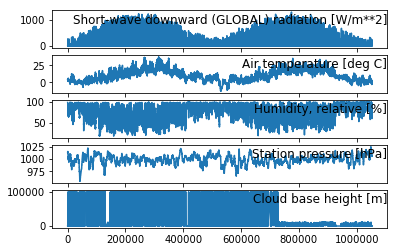

In [2]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('RNNtry.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

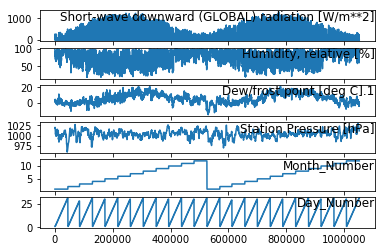

In [14]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('RNNtry.csv', header=0, index_col=0)
dataset=dataset.drop('IIiii',1)
values = dataset.values
# specify columns to plot
groups = [ 0, 2, 15, 16, 22, 23]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [5]:
list(dataset)

['Short-wave downward (GLOBAL) radiation [W/m**2]',
 'Air temperature [deg C]',
 'Humidity, relative [%]',
 'Station pressure [hPa]',
 'Cloud base height [m]',
 'Altitude [m]',
 'Pressure, at given altitude [hPa]',
 'Temperature, air [deg C]',
 'Dew/frost point [deg C]',
 'Wind direction [deg]',
 'Wind speed [m/sec]',
 'IIiii',
 'Total cloud amount [code]',
 'Wind direction [deg].1',
 'Wind speed [m/sec].1',
 'Temperature, air [deg C].1',
 'Dew/frost point [deg C].1',
 'Station Pressure [hPa]',
 'Pressure, atmospheric [hPa]',
 'Present weather [code]',
 'Past weather1 [code]',
 'Past weather2 [code]',
 'Week_Number',
 'Month_Number',
 'Day_Number',
 'Hour_Number',
 'Year_Number']

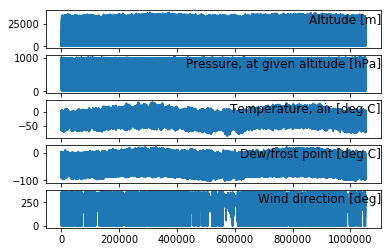

In [18]:
groups = [5, 6, 7, 8, 9]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

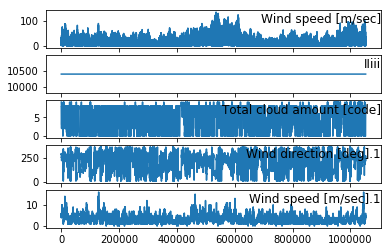

In [19]:
groups = [10, 11, 12, 13, 14]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

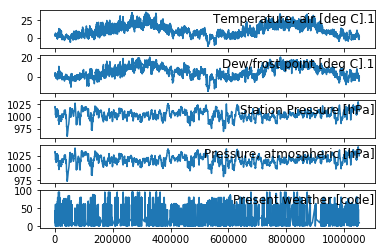

In [20]:
groups = [15, 16, 17, 18, 19]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

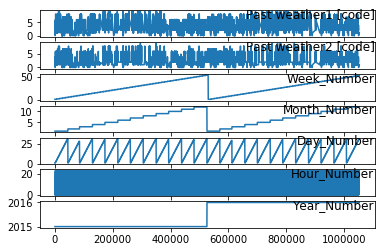

In [21]:
groups = [20, 21, 22, 23, 24,25,26]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [22]:
set(dataset['IIiii'])

{10393.0}

# Start Analysis with LSTM

## function used to transform the dataset into a desired form for LSTM

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# load dataset
dataset = read_csv('RNNtry.csv', header=0, index_col=0)
dataset=dataset.drop('IIiii',1)
values = dataset.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]], axis=1, inplace=True)
print(reframed.head())
print(list(reframed))

# Feature Selection

In [15]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [16]:
from keras import backend
 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [25]:
dataset = pd.read_csv('RNNtry.csv', header=0, index_col=0)
dataset=dataset.drop('IIiii',1)
dataset.shape

(1052640, 26)

# Split into Training(included validation) and Test set

In [18]:
dataset = pd.read_csv('RNNtry.csv', header=0, index_col=0)
dataset=dataset.drop('IIiii',1)
print("Original dataset",dataset.shape)
n_train_hours = int(1052639*0.80)
traindev = dataset[:n_train_hours]
RealTestSet = dataset[n_train_hours:]
print("Shape of training(included validation): ",traindev.shape)
print("Shape of testing set: ", RealTestSet.shape)

Original dataset (1052640, 26)
Shape of training(included validation):  (842111, 26)
Shape of testing set:  (210529, 26)


# Keep in mind that in the following code "test" is used, but this refers to the validation set not the RealTestSet

## Find best number of features using Univariate Feature selection and iteratively adding 1 to the dataset and then training the model using walk-forward cross validation and then taking the mean rmse and std, to determine best number of features.

In [43]:
xaxis=[]
for x in range(5,26,2):
    xaxis.append(x)
xaxis

[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

In [42]:
#feature scaling
#split train test
#for x in range(1,26):
    #for i in timesplits(10):
        #find k best features
        #built model; keep final mse error of training & testing
    #keep mean rmse/mse
#plot all mse errors

# config
batch_n = 1000
epoch_n = 10
lr_n = 0.001
neurons_n = 50

testmses=[]
trainmses=[]
testrmses=[]
df2 = dataset.drop('Short-wave downward (GLOBAL) radiation [W/m**2]',1)
keeptrack_rmse=[]
keeptrack_rmsestd=[]
keeptrack_trainrmse=[]
keeptrack_trainrmsestd=[]
dataset=traindev
for x in range(5,26,2):
# normalize features
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(dataset)

    # split into train and test sets
    # total = 1052639
    values=scaled
    n_train_hours = int(842111*0.80)
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    selection = SelectKBest(k=x)
    X_new = selection.fit_transform(train_X, train_y)
    print(X_new.shape)
    indexes = selection.get_support(indices=True)
    print(indexes)

    goodlist=[]
    goodlist.append('Short-wave downward (GLOBAL) radiation [W/m**2]')
    for i in list(df2[indexes]):
        goodlist.append(i)
    reduceddf = dataset[goodlist]
    print("Shape of reduced: ",reduceddf.shape)
    
    values = reduceddf.values
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    remove = range(x+2, x*2+2)
    removelist=[]
    for p in remove:
        removelist.append(p)
    reframed.drop(reframed.columns[removelist], axis=1, inplace=True)
    print(list(reframed))

    # split into train and test sets
    # total = 1052639
    values = reframed.values
    X, Y = values[:, :-1], values[:, -1]

        #-----------Cross-Validation--------------------------------------
    
    # fix random seed for reproducibility
    seed = 7
    numpy.random.seed(seed)
    # define cross validation method
    kfold = TimeSeriesSplit(n_splits=10)
    cvscores = []
    cvscorestrain=[]
    for train, test in kfold.split(X, Y):
        train_X, test_X = X[train], X[test]
        train_y, test_y = Y[train], Y[test]

        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        print("Dimensions of split: ",train_X.shape, train_y.shape, test_X.shape, test_y.shape)

         # design network
        model = Sequential()
        model.add(LSTM(neurons_n, input_shape=(train_X.shape[1], train_X.shape[2]), kernel_initializer='uniform'))
        model.add(Dense(1))
        model.add(Activation('linear'))
        adam=keras.optimizers.Adam(lr=lr_n)
        model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])

        # Fit the model
        model.fit(train_X, train_y, epochs=epoch_n, batch_size=batch_n,validation_data=(test_X, test_y), verbose=0, shuffle=False)

        # make a prediction
        yhat = model.predict(test_X)
        yhatrain = model.predict(train_X)
        test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
        # invert scaling for forecast
        inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]
        inv_yhatrain = concatenate((yhatrain, train_X[:, 1:]), axis=1)
        inv_yhatrain = scaler.inverse_transform(inv_yhatrain)
        inv_yhatrain = inv_yhatrain[:,0]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,0]
        train_y = train_y.reshape((len(train_y), 1))
        inv_ytrain = concatenate((train_y, train_X[:, 1:]), axis=1)
        inv_ytrain = scaler.inverse_transform(inv_ytrain)
        inv_ytrain = inv_ytrain[:,0]
        testrmse = sqrt(mean_squared_error(inv_y, inv_yhat))
        trainrmse = sqrt(mean_squared_error(inv_ytrain, inv_yhatrain))
        #print('Final Validation RMSE: %.3f' % testrmse)
        cvscores.append(testrmse)
        cvscorestrain.append(trainrmse)
    print("Mean: " ,numpy.mean(cvscores), " std: ",numpy.std(cvscores))
    #keep track
    keeptrack_rmse.append(numpy.mean(cvscores))
    keeptrack_rmsestd.append(numpy.std(cvscores))
    keeptrack_trainrmse.append(numpy.mean(cvscorestrain))
    keeptrack_trainrmsestd.append(numpy.std(cvscorestrain))
    #-------------------------------------------------------------------------
    

C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(673688, 5)
[ 1 14 15 21 22]
Shape of reduced:  (842111, 6)
['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var1(t)']
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Dimensions of split:  (153115, 1, 6) (153115,) (76555, 1, 6) (76555,)
Dimensions of split:  (229670, 1, 6) (229670,) (76555, 1, 6) (76555,)
Dimensions of split:  (306225, 1, 6) (306225,) (76555, 1, 6) (76555,)
Dimensions of split:  (382780, 1, 6) (382780,) (76555, 1, 6) (76555,)
Dimensions of split:  (459335, 1, 6) (459335,) (76555, 1, 6) (76555,)
Dimensions of split:  (535890, 1, 6) (535890,) (76555, 1, 6) (76555,)
Dimensions of split:  (612445, 1, 6) (612445,) (76555, 1, 6) (76555,)
Dimensions of split:  (689000, 1, 6) (689000,) (76555, 1, 6) (76555,)
Dimensions of split:  (765555, 1, 6) (765555,) (76555, 1, 6) (76555,)
Mean:  40.512352561241514  std:  20.095092260221968
(673688, 7)
[ 1  3 10 14 15 21 22]
Shape of reduced:  (842111, 8)
['var1(t-1)', 'var2(t-1)', 'var3(t

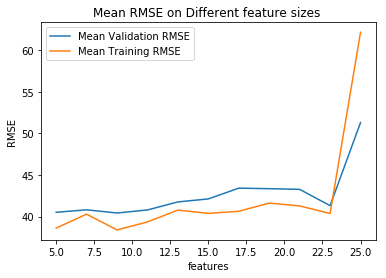

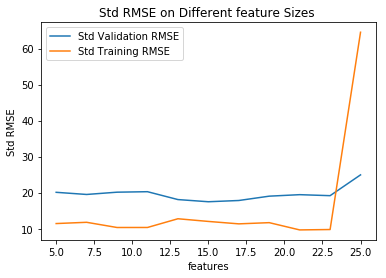

In [44]:
x=xaxis
pyplot.plot(x, keeptrack_rmse, label='Mean Validation RMSE')
pyplot.plot(x, keeptrack_trainrmse, label='Mean Training RMSE')
pyplot.title('Mean RMSE on Different feature sizes ')
pyplot.ylabel('RMSE')
pyplot.xlabel('features')
pyplot.legend()
pyplot.show()

pyplot.plot(x, keeptrack_rmsestd, label='Std Validation RMSE')
pyplot.plot(x, keeptrack_trainrmsestd, label='Std Training RMSE')
pyplot.title('Std RMSE on Different feature Sizes ')
pyplot.ylabel('Std RMSE')
pyplot.xlabel('features')
pyplot.legend()
pyplot.show()

# Chosen number of features = 5
- Humidity, relative [%]	
- Dew/frost point [deg C].1	
- Station Pressure [hPa]	
- Month_Number	
- Day_Number

# Next Step: Number of neurons

In [46]:
# config
batch_n = 1000
epoch_n = 10
lr_n = 0.001
#neurons_n = 50
x= 5#number of features

from keras import backend
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

dataset=traindev
df2 = dataset.drop('Short-wave downward (GLOBAL) radiation [W/m**2]',1)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

# split into train and test sets
# total = 1052639
values=scaled
n_train_hours = int(842111*0.80)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

selection = SelectKBest(k=x)
X_new = selection.fit_transform(train_X, train_y)
print(X_new.shape)
indexes = selection.get_support(indices=True)
print(indexes)

goodlist=[]
goodlist.append('Short-wave downward (GLOBAL) radiation [W/m**2]')
for i in list(df2[indexes]):
    goodlist.append(i)
reduceddf = dataset[goodlist]
print("Shape of reduced: ",reduceddf.shape)

values = reduceddf.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
remove = range(x+2, x*2+2)
removelist=[]
for p in remove:
    removelist.append(p)
reframed.drop(reframed.columns[removelist], axis=1, inplace=True)
print(list(reframed))

# split into train and test sets
# total = 1052639
values = reframed.values
X, Y = values[:, :-1], values[:, -1]

#-----------Using-different-parameter-sizes---------------------------
tunelist=[25, 50, 75, 100]
keeptrack_rmse=[]
keeptrack_rmsestd=[]
keeptrack_trainrmse=[]
keeptrack_trainrmsestd=[]
for i in tunelist:
    neurons_n=i
    
    #-----------Cross-Validation--------------------------------------
    
    # fix random seed for reproducibility
    seed = 7
    numpy.random.seed(seed)
    # define cross validation method
    kfold = TimeSeriesSplit(n_splits=10)
    cvscores = []
    cvscorestrain=[]
    for train, test in kfold.split(X, Y):
        train_X, test_X = X[train], X[test]
        train_y, test_y = Y[train], Y[test]

        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        print("Dimensions of split: ",train_X.shape, train_y.shape, test_X.shape, test_y.shape)

         # design network
        model = Sequential()
        model.add(LSTM(neurons_n, input_shape=(train_X.shape[1], train_X.shape[2]), kernel_initializer='uniform'))
        model.add(Dense(1))
        model.add(Activation('linear'))
        adam=keras.optimizers.Adam(lr=lr_n)
        model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])

        # Fit the model
        model.fit(train_X, train_y, epochs=epoch_n, batch_size=batch_n,validation_data=(test_X, test_y), verbose=0, shuffle=False)

        # make a prediction
        yhat = model.predict(test_X)
        yhatrain = model.predict(train_X)
        test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
        # invert scaling for forecast
        inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]
        inv_yhatrain = concatenate((yhatrain, train_X[:, 1:]), axis=1)
        inv_yhatrain = scaler.inverse_transform(inv_yhatrain)
        inv_yhatrain = inv_yhatrain[:,0]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,0]
        train_y = train_y.reshape((len(train_y), 1))
        inv_ytrain = concatenate((train_y, train_X[:, 1:]), axis=1)
        inv_ytrain = scaler.inverse_transform(inv_ytrain)
        inv_ytrain = inv_ytrain[:,0]
        testrmse = sqrt(mean_squared_error(inv_y, inv_yhat))
        trainrmse = sqrt(mean_squared_error(inv_ytrain, inv_yhatrain))
        #print('Final Validation RMSE: %.3f' % testrmse)
        cvscores.append(testrmse)
        cvscorestrain.append(trainrmse)
    print("Mean: " ,numpy.mean(cvscores), " std: ",numpy.std(cvscores))
    #keep track
    keeptrack_rmse.append(numpy.mean(cvscores))
    keeptrack_rmsestd.append(numpy.std(cvscores))
    keeptrack_trainrmse.append(numpy.mean(cvscorestrain))
    keeptrack_trainrmsestd.append(numpy.std(cvscorestrain))
    #-------------------------------------------------------------------------

C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(673688, 5)
[ 1 14 15 21 22]
Shape of reduced:  (842111, 6)
['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var1(t)']
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Dimensions of split:  (153115, 1, 6) (153115,) (76555, 1, 6) (76555,)
Dimensions of split:  (229670, 1, 6) (229670,) (76555, 1, 6) (76555,)
Dimensions of split:  (306225, 1, 6) (306225,) (76555, 1, 6) (76555,)
Dimensions of split:  (382780, 1, 6) (382780,) (76555, 1, 6) (76555,)
Dimensions of split:  (459335, 1, 6) (459335,) (76555, 1, 6) (76555,)
Dimensions of split:  (535890, 1, 6) (535890,) (76555, 1, 6) (76555,)
Dimensions of split:  (612445, 1, 6) (612445,) (76555, 1, 6) (76555,)
Dimensions of split:  (689000, 1, 6) (689000,) (76555, 1, 6) (76555,)
Dimensions of split:  (765555, 1, 6) (765555,) (76555, 1, 6) (76555,)
Mean:  40.60098869070485  std:  20.94205836916235
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Dimensions of split:  (153115, 1, 

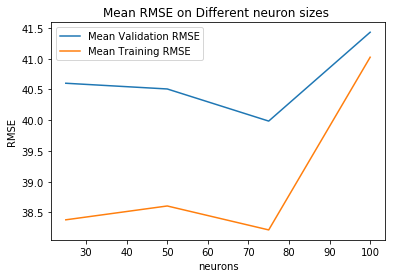

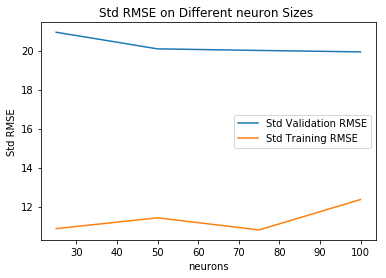

In [47]:
x=tunelist
pyplot.plot(x, keeptrack_rmse, label='Mean Validation RMSE')
pyplot.plot(x, keeptrack_trainrmse, label='Mean Training RMSE')
pyplot.title('Mean RMSE on Different neuron sizes ')
pyplot.ylabel('RMSE')
pyplot.xlabel('neurons')
pyplot.legend()
pyplot.show()

pyplot.plot(x, keeptrack_rmsestd, label='Std Validation RMSE')
pyplot.plot(x, keeptrack_trainrmsestd, label='Std Training RMSE')
pyplot.title('Std RMSE on Different neuron Sizes ')
pyplot.ylabel('Std RMSE')
pyplot.xlabel('neurons')
pyplot.legend()
pyplot.show()

# Next step: Batch Size & Learning Rate

In [48]:
# config
#batch_n = 1000
epoch_n = 10
lr_n = 0.001
neurons_n = 75
x= 5 #number of features

from keras import backend
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

dataset=traindev
df2 = dataset.drop('Short-wave downward (GLOBAL) radiation [W/m**2]',1)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

# split into train and test sets
# total = 1052639
values=scaled
n_train_hours = int(842111*0.80)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

selection = SelectKBest(k=x)
X_new = selection.fit_transform(train_X, train_y)
print(X_new.shape)
indexes = selection.get_support(indices=True)
print(indexes)

goodlist=[]
goodlist.append('Short-wave downward (GLOBAL) radiation [W/m**2]')
for i in list(df2[indexes]):
    goodlist.append(i)
reduceddf = dataset[goodlist]
print("Shape of reduced: ",reduceddf.shape)

values = reduceddf.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
remove = range(x+2, x*2+2)
removelist=[]
for p in remove:
    removelist.append(p)
reframed.drop(reframed.columns[removelist], axis=1, inplace=True)
print(list(reframed))

# split into train and test sets
# total = 1052639
values = reframed.values
X, Y = values[:, :-1], values[:, -1]

#-----------Using-different-parameter-sizes---------------------------
tunelist=[500, 1000, 5000, 7000, 9000, 10000]
keeptrack_rmse=[]
keeptrack_rmsestd=[]
keeptrack_trainrmse=[]
keeptrack_trainrmsestd=[]
for i in tunelist:
    batch_n=i
    
    #-----------Cross-Validation--------------------------------------
    
    # fix random seed for reproducibility
    seed = 7
    numpy.random.seed(seed)
    # define cross validation method
    kfold = TimeSeriesSplit(n_splits=10)
    cvscores = []
    cvscorestrain=[]
    for train, test in kfold.split(X, Y):
        train_X, test_X = X[train], X[test]
        train_y, test_y = Y[train], Y[test]

        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        print("Dimensions of split: ",train_X.shape, train_y.shape, test_X.shape, test_y.shape)

         # design network
        model = Sequential()
        model.add(LSTM(neurons_n, input_shape=(train_X.shape[1], train_X.shape[2]), kernel_initializer='uniform'))
        model.add(Dense(1))
        model.add(Activation('linear'))
        adam=keras.optimizers.Adam(lr=lr_n)
        model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])

        # Fit the model
        model.fit(train_X, train_y, epochs=epoch_n, batch_size=batch_n,validation_data=(test_X, test_y), verbose=0, shuffle=False)

        # make a prediction
        yhat = model.predict(test_X)
        yhatrain = model.predict(train_X)
        test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
        # invert scaling for forecast
        inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]
        inv_yhatrain = concatenate((yhatrain, train_X[:, 1:]), axis=1)
        inv_yhatrain = scaler.inverse_transform(inv_yhatrain)
        inv_yhatrain = inv_yhatrain[:,0]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,0]
        train_y = train_y.reshape((len(train_y), 1))
        inv_ytrain = concatenate((train_y, train_X[:, 1:]), axis=1)
        inv_ytrain = scaler.inverse_transform(inv_ytrain)
        inv_ytrain = inv_ytrain[:,0]
        testrmse = sqrt(mean_squared_error(inv_y, inv_yhat))
        trainrmse = sqrt(mean_squared_error(inv_ytrain, inv_yhatrain))
        #print('Final Validation RMSE: %.3f' % testrmse)
        cvscores.append(testrmse)
        cvscorestrain.append(trainrmse)
    print("Mean: " ,numpy.mean(cvscores), " std: ",numpy.std(cvscores))
    #keep track
    keeptrack_rmse.append(numpy.mean(cvscores))
    keeptrack_rmsestd.append(numpy.std(cvscores))
    keeptrack_trainrmse.append(numpy.mean(cvscorestrain))
    keeptrack_trainrmsestd.append(numpy.std(cvscorestrain))
    #-------------------------------------------------------------------------

C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(673688, 5)
[ 1 14 15 21 22]
Shape of reduced:  (842111, 6)
['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var1(t)']
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Dimensions of split:  (153115, 1, 6) (153115,) (76555, 1, 6) (76555,)
Dimensions of split:  (229670, 1, 6) (229670,) (76555, 1, 6) (76555,)
Dimensions of split:  (306225, 1, 6) (306225,) (76555, 1, 6) (76555,)
Dimensions of split:  (382780, 1, 6) (382780,) (76555, 1, 6) (76555,)
Dimensions of split:  (459335, 1, 6) (459335,) (76555, 1, 6) (76555,)
Dimensions of split:  (535890, 1, 6) (535890,) (76555, 1, 6) (76555,)
Dimensions of split:  (612445, 1, 6) (612445,) (76555, 1, 6) (76555,)
Dimensions of split:  (689000, 1, 6) (689000,) (76555, 1, 6) (76555,)
Dimensions of split:  (765555, 1, 6) (765555,) (76555, 1, 6) (76555,)
Mean:  41.76791601884928  std:  17.477392240779423
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Dimensions of split:  (153115, 1,

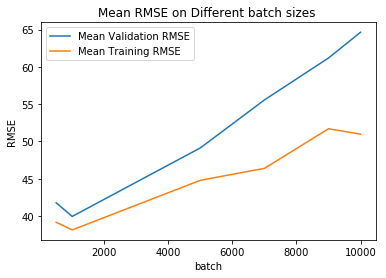

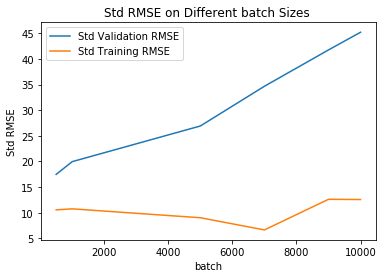

In [49]:
x=tunelist
pyplot.plot(x, keeptrack_rmse, label='Mean Validation RMSE')
pyplot.plot(x, keeptrack_trainrmse, label='Mean Training RMSE')
pyplot.title('Mean RMSE on Different batch sizes ')
pyplot.ylabel('RMSE')
pyplot.xlabel('batch')
pyplot.legend()
pyplot.show()

pyplot.plot(x, keeptrack_rmsestd, label='Std Validation RMSE')
pyplot.plot(x, keeptrack_trainrmsestd, label='Std Training RMSE')
pyplot.title('Std RMSE on Different batch Sizes ')
pyplot.ylabel('Std RMSE')
pyplot.xlabel('batch')
pyplot.legend()
pyplot.show()

# RESULT WITH BEST MEAN RMSE: 
## Batch size 1000: 
## Mean:  39.94051493420539  std:  19.95920419424621

###  Smaller learning rate 0.0001:

In [97]:
# config
#batch_n = 1000
epoch_n = 10
lr_n = 0.0001
neurons_n = 75
x= 5 #number of features

from keras import backend
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

dataset=traindev
df2 = dataset.drop('Short-wave downward (GLOBAL) radiation [W/m**2]',1)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

# split into train and test sets
# total = 1052639
values=scaled
n_train_hours = int(842111*0.80)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

selection = SelectKBest(k=x)
X_new = selection.fit_transform(train_X, train_y)
print(X_new.shape)
indexes = selection.get_support(indices=True)
print(indexes)

goodlist=[]
goodlist.append('Short-wave downward (GLOBAL) radiation [W/m**2]')
for i in list(df2[indexes]):
    goodlist.append(i)
reduceddf = dataset[goodlist]
print("Shape of reduced: ",reduceddf.shape)

values = reduceddf.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
remove = range(x+2, x*2+2)
removelist=[]
for p in remove:
    removelist.append(p)
reframed.drop(reframed.columns[removelist], axis=1, inplace=True)
print(list(reframed))

# split into train and test sets
# total = 1052639
values = reframed.values
X, Y = values[:, :-1], values[:, -1]

#-----------Using-different-parameter-sizes---------------------------
tunelist=[500, 1000, 5000, 7000, 9000, 10000]
keeptrack_rmse=[]
keeptrack_rmsestd=[]
keeptrack_trainrmse=[]
keeptrack_trainrmsestd=[]
for i in tunelist:
    batch_n=i
    
    #-----------Cross-Validation--------------------------------------
    
    # fix random seed for reproducibility
    seed = 7
    numpy.random.seed(seed)
    # define cross validation method
    kfold = TimeSeriesSplit(n_splits=10)
    cvscores = []
    cvscorestrain=[]
    for train, test in kfold.split(X, Y):
        train_X, test_X = X[train], X[test]
        train_y, test_y = Y[train], Y[test]

        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        print("Dimensions of split: ",train_X.shape, train_y.shape, test_X.shape, test_y.shape)

         # design network
        model = Sequential()
        model.add(LSTM(neurons_n, input_shape=(train_X.shape[1], train_X.shape[2]), kernel_initializer='uniform'))
        model.add(Dense(1))
        model.add(Activation('linear'))
        adam=keras.optimizers.Adam(lr=lr_n)
        model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])

        # Fit the model
        model.fit(train_X, train_y, epochs=epoch_n, batch_size=batch_n,validation_data=(test_X, test_y), verbose=0, shuffle=False)

        # make a prediction
        yhat = model.predict(test_X)
        yhatrain = model.predict(train_X)
        test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
        # invert scaling for forecast
        inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]
        inv_yhatrain = concatenate((yhatrain, train_X[:, 1:]), axis=1)
        inv_yhatrain = scaler.inverse_transform(inv_yhatrain)
        inv_yhatrain = inv_yhatrain[:,0]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,0]
        train_y = train_y.reshape((len(train_y), 1))
        inv_ytrain = concatenate((train_y, train_X[:, 1:]), axis=1)
        inv_ytrain = scaler.inverse_transform(inv_ytrain)
        inv_ytrain = inv_ytrain[:,0]
        testrmse = sqrt(mean_squared_error(inv_y, inv_yhat))
        trainrmse = sqrt(mean_squared_error(inv_ytrain, inv_yhatrain))
        #print('Final Validation RMSE: %.3f' % testrmse)
        cvscores.append(testrmse)
        cvscorestrain.append(trainrmse)
    print("Mean: " ,numpy.mean(cvscores), " std: ",numpy.std(cvscores))
    #keep track
    keeptrack_rmse.append(numpy.mean(cvscores))
    keeptrack_rmsestd.append(numpy.std(cvscores))
    keeptrack_trainrmse.append(numpy.mean(cvscorestrain))
    keeptrack_trainrmsestd.append(numpy.std(cvscorestrain))
    #-------------------------------------------------------------------------

C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(673688, 5)
[ 1 14 15 21 22]
Shape of reduced:  (842111, 6)
['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var1(t)']
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Dimensions of split:  (153115, 1, 6) (153115,) (76555, 1, 6) (76555,)
Dimensions of split:  (229670, 1, 6) (229670,) (76555, 1, 6) (76555,)
Dimensions of split:  (306225, 1, 6) (306225,) (76555, 1, 6) (76555,)
Dimensions of split:  (382780, 1, 6) (382780,) (76555, 1, 6) (76555,)
Dimensions of split:  (459335, 1, 6) (459335,) (76555, 1, 6) (76555,)
Dimensions of split:  (535890, 1, 6) (535890,) (76555, 1, 6) (76555,)
Dimensions of split:  (612445, 1, 6) (612445,) (76555, 1, 6) (76555,)
Dimensions of split:  (689000, 1, 6) (689000,) (76555, 1, 6) (76555,)
Dimensions of split:  (765555, 1, 6) (765555,) (76555, 1, 6) (76555,)
Mean:  41.76308124029022  std:  17.453286341843928
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Dimensions of split:  (153115, 1,

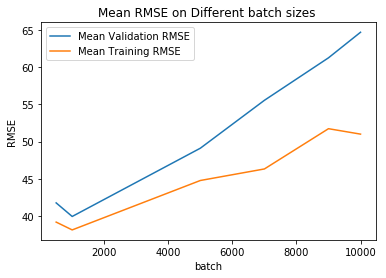

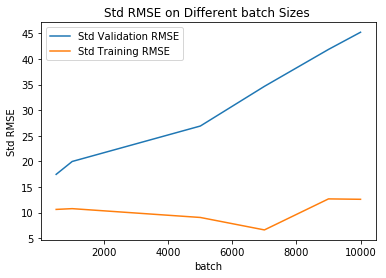

In [98]:
x=tunelist
pyplot.plot(x, keeptrack_rmse, label='Mean Validation RMSE')
pyplot.plot(x, keeptrack_trainrmse, label='Mean Training RMSE')
pyplot.title('Mean RMSE on Different batch sizes ')
pyplot.ylabel('RMSE')
pyplot.xlabel('batch')
pyplot.legend()
pyplot.show()

pyplot.plot(x, keeptrack_rmsestd, label='Std Validation RMSE')
pyplot.plot(x, keeptrack_trainrmsestd, label='Std Training RMSE')
pyplot.title('Std RMSE on Different batch Sizes ')
pyplot.ylabel('Std RMSE')
pyplot.xlabel('batch')
pyplot.legend()
pyplot.show()

In [19]:
# config
#batch_n = 1000
epoch_n = 10
lr_n = 0.01
neurons_n = 75
x= 5 #number of features

from keras import backend
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

dataset=traindev
df2 = dataset.drop('Short-wave downward (GLOBAL) radiation [W/m**2]',1)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

# split into train and test sets
# total = 1052639
values=scaled
n_train_hours = int(842111*0.80)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

selection = SelectKBest(k=x)
X_new = selection.fit_transform(train_X, train_y)
print(X_new.shape)
indexes = selection.get_support(indices=True)
print(indexes)

goodlist=[]
goodlist.append('Short-wave downward (GLOBAL) radiation [W/m**2]')
for i in list(df2[indexes]):
    goodlist.append(i)
reduceddf = dataset[goodlist]
print("Shape of reduced: ",reduceddf.shape)

values = reduceddf.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
remove = range(x+2, x*2+2)
removelist=[]
for p in remove:
    removelist.append(p)
reframed.drop(reframed.columns[removelist], axis=1, inplace=True)
print(list(reframed))

# split into train and test sets
# total = 1052639
values = reframed.values
X, Y = values[:, :-1], values[:, -1]

#-----------Using-different-parameter-sizes---------------------------
tunelist=[500, 1000, 5000, 7000, 9000, 10000]
keeptrack_rmse=[]
keeptrack_rmsestd=[]
keeptrack_trainrmse=[]
keeptrack_trainrmsestd=[]
for i in tunelist:
    batch_n=i
    
    #-----------Cross-Validation--------------------------------------
    
    # fix random seed for reproducibility
    seed = 7
    numpy.random.seed(seed)
    # define cross validation method
    kfold = TimeSeriesSplit(n_splits=10)
    cvscores = []
    cvscorestrain=[]
    for train, test in kfold.split(X, Y):
        train_X, test_X = X[train], X[test]
        train_y, test_y = Y[train], Y[test]

        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        print("Dimensions of split: ",train_X.shape, train_y.shape, test_X.shape, test_y.shape)

         # design network
        model = Sequential()
        model.add(LSTM(neurons_n, input_shape=(train_X.shape[1], train_X.shape[2]), kernel_initializer='uniform'))
        model.add(Dense(1))
        model.add(Activation('linear'))
        adam=keras.optimizers.Adam(lr=lr_n)
        model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])

        # Fit the model
        model.fit(train_X, train_y, epochs=epoch_n, batch_size=batch_n,validation_data=(test_X, test_y), verbose=0, shuffle=False)

        # make a prediction
        yhat = model.predict(test_X)
        yhatrain = model.predict(train_X)
        test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
        # invert scaling for forecast
        inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
        inv_yhat = scaler.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]
        inv_yhatrain = concatenate((yhatrain, train_X[:, 1:]), axis=1)
        inv_yhatrain = scaler.inverse_transform(inv_yhatrain)
        inv_yhatrain = inv_yhatrain[:,0]
        # invert scaling for actual
        test_y = test_y.reshape((len(test_y), 1))
        inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
        inv_y = scaler.inverse_transform(inv_y)
        inv_y = inv_y[:,0]
        train_y = train_y.reshape((len(train_y), 1))
        inv_ytrain = concatenate((train_y, train_X[:, 1:]), axis=1)
        inv_ytrain = scaler.inverse_transform(inv_ytrain)
        inv_ytrain = inv_ytrain[:,0]
        testrmse = sqrt(mean_squared_error(inv_y, inv_yhat))
        trainrmse = sqrt(mean_squared_error(inv_ytrain, inv_yhatrain))
        #print('Final Validation RMSE: %.3f' % testrmse)
        cvscores.append(testrmse)
        cvscorestrain.append(trainrmse)
    print("Mean: " ,numpy.mean(cvscores), " std: ",numpy.std(cvscores))
    #keep track
    keeptrack_rmse.append(numpy.mean(cvscores))
    keeptrack_rmsestd.append(numpy.std(cvscores))
    keeptrack_trainrmse.append(numpy.mean(cvscorestrain))
    keeptrack_trainrmsestd.append(numpy.std(cvscorestrain))
    #-------------------------------------------------------------------------

C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(673688, 5)
[ 1 14 15 21 22]
Shape of reduced:  (842111, 6)
['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var1(t)']
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Dimensions of split:  (153115, 1, 6) (153115,) (76555, 1, 6) (76555,)
Dimensions of split:  (229670, 1, 6) (229670,) (76555, 1, 6) (76555,)
Dimensions of split:  (306225, 1, 6) (306225,) (76555, 1, 6) (76555,)
Dimensions of split:  (382780, 1, 6) (382780,) (76555, 1, 6) (76555,)
Dimensions of split:  (459335, 1, 6) (459335,) (76555, 1, 6) (76555,)
Dimensions of split:  (535890, 1, 6) (535890,) (76555, 1, 6) (76555,)
Dimensions of split:  (612445, 1, 6) (612445,) (76555, 1, 6) (76555,)
Dimensions of split:  (689000, 1, 6) (689000,) (76555, 1, 6) (76555,)
Dimensions of split:  (765555, 1, 6) (765555,) (76555, 1, 6) (76555,)
Mean:  41.77948527868567  std:  17.469133646403293
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Dimensions of split:  (153115, 1,

# Resulting model:
## batch_n = 1000
## lr_n = 0.01
## neurons_n = 75

C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(673688, 5)
[ 1 14 15 21 22]
Shape of reduced:  (842111, 6)
['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var1(t)']
(673688, 1, 6) (673688,) (168422, 1, 6) (168422,)
Train on 673688 samples, validate on 168422 samples
Epoch 1/10
 - 25s - loss: 0.0020 - rmse: 0.0233 - val_loss: 0.0024 - val_rmse: 0.0181
Epoch 2/10
 - 18s - loss: 7.5133e-04 - rmse: 0.0092 - val_loss: 0.0024 - val_rmse: 0.0174
Epoch 3/10
 - 17s - loss: 7.2782e-04 - rmse: 0.0082 - val_loss: 0.0023 - val_rmse: 0.0170
Epoch 4/10
 - 18s - loss: 7.1937e-04 - rmse: 0.0081 - val_loss: 0.0022 - val_rmse: 0.0167
Epoch 5/10
 - 19s - loss: 7.2070e-04 - rmse: 0.0086 - val_loss: 0.0022 - val_rmse: 0.0171
Epoch 6/10
 - 17s - loss: 7.1791e-04 - rmse: 0.0087 - val_loss: 0.0022 - val_rmse: 0.0178
Epoch 7/10
 - 17s - loss: 7.1671e-04 - rmse: 0.0088 - val_loss: 0.0021 - val_rmse: 0.0179
Epoch 8/10
 - 16s - loss: 7.1996e-04 - rmse: 0.0091 - val_loss: 0.0021 - val_rmse: 0.0177
Epoch 9/10
 - 16s - loss: 7.2250

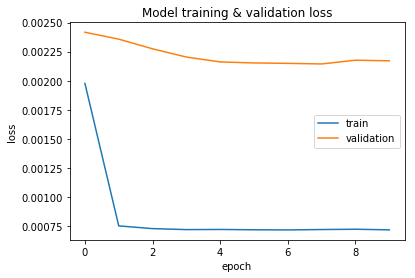

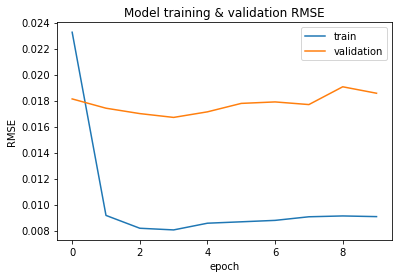

Model Evaluation scores:
Test RMSE: 61.271
Test R2: 0.950
Test MSE: 3754.174
Test MAE: 24.410
Mean forcast error; MBE: 8.823
AbsDev: 0.113


In [20]:
# config
batch_n = 1000
epoch_n = 10
lr_n = 0.01
neurons_n = 75
x= 5 #number of features

from keras import backend
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

dataset=traindev
df2 = dataset.drop('Short-wave downward (GLOBAL) radiation [W/m**2]',1)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

# split into train and test sets
# total = 1052639
values=scaled
n_train_hours = int(842111*0.80)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

selection = SelectKBest(k=x)
X_new = selection.fit_transform(train_X, train_y)
print(X_new.shape)
indexes = selection.get_support(indices=True)
print(indexes)

goodlist=[]
goodlist.append('Short-wave downward (GLOBAL) radiation [W/m**2]')
for i in list(df2[indexes]):
    goodlist.append(i)
reduceddf = dataset[goodlist]
print("Shape of reduced: ",reduceddf.shape)

values = reduceddf.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
remove = range(x+2, x*2+2)
removelist=[]
for p in remove:
    removelist.append(p)
reframed.drop(reframed.columns[removelist], axis=1, inplace=True)
print(list(reframed))

# split into train and test sets
values = reframed.values
n_train_hours = int(842111*0.80)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(neurons_n, input_shape=(train_X.shape[1], train_X.shape[2]), kernel_initializer='uniform'))
model.add(Dense(1))
model.add(Activation('linear'))
adam=keras.optimizers.Adam(lr=lr_n)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])

# fit network
#callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')]
history = model.fit(train_X, train_y, epochs=epoch_n, batch_size=batch_n, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.title('Model training & validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend()
pyplot.show()

#plot rmse
pyplot.plot(history.history['rmse'], label='train')
pyplot.plot(history.history['val_rmse'], label='validation')
pyplot.title('Model training & validation RMSE')
pyplot.ylabel('RMSE')
pyplot.xlabel('epoch')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
yhatrain = model.predict(train_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# model evaluation
from sklearn import metrics
print("Model Evaluation scores:")
# calculate RMSE
testrmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % testrmse)
# calculate Rsqured
r2=r2_score(inv_y, inv_yhat)
print('Test R2: %.3f' % r2)
# calculate mse
mse = mean_squared_error(inv_y, inv_yhat)
print('Test MSE: %.3f' % mse)
# mean absolute error
mae = metrics.mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)
# Mean Forecast Error (or Residual Forecast Error)
forecast_errors = [inv_y[i]-inv_yhat[i] for i in range(len(inv_y))]
bias = sum(forecast_errors) * 1.0/len(inv_y)
print('Mean forcast error; MBE: %.3f' % bias)
absdev=(1/sum(inv_y))* sum(numpy.abs(inv_yhat - inv_y))
print('AbsDev: %.3f' % absdev)

C:\Users\Cynthia\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(673688, 5)
[ 1 14 15 21 22]
Shape of reduced:  (842111, 6)
['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var1(t)']
Dimensions of split:  (76560, 1, 6) (76560,) (76555, 1, 6) (76555,)
Train on 76560 samples, validate on 76555 samples
Epoch 1/10
 - 2s - loss: 7.3682e-05 - rmse: 0.0046 - val_loss: 6.6138e-04 - val_rmse: 0.0089
Epoch 2/10
 - 2s - loss: 6.9004e-05 - rmse: 0.0042 - val_loss: 6.5334e-04 - val_rmse: 0.0082
Epoch 3/10
 - 2s - loss: 6.5017e-05 - rmse: 0.0038 - val_loss: 6.5052e-04 - val_rmse: 0.0078
Epoch 4/10
 - 3s - loss: 6.1542e-05 - rmse: 0.0035 - val_loss: 6.5035e-04 - val_rmse: 0.0078
Epoch 5/10
 - 2s - loss: 5.8655e-05 - rmse: 0.0032 - val_loss: 6.5304e-04 - val_rmse: 0.0082
Epoch 6/10
 - 2s - loss: 5.6601e-05 - rmse: 0.0028 - val_loss: 6.5818e-04 - val_rmse: 0.0087
Epoch 7/10
 - 2s - loss: 5.5382e-05 - rmse: 0.0026 - val_loss: 6.6335e-04 - val_rmse: 0.0093
Epoch 8/10
 - 2s - loss: 5.4784e-05 - rmse: 0.0025 - val_loss: 6.6563e-04 - val_r

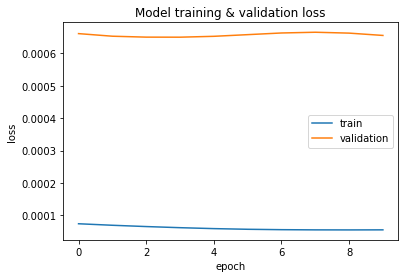

Test RMSE: 33.674
Test R2: 0.972
Test MSE: 1133.942
Test MAE: 11.625
Mean forcast error; MBE: 4.687
AbsDev: 0.092
Dimensions of split:  (153115, 1, 6) (153115,) (76555, 1, 6) (76555,)
Train on 153115 samples, validate on 76555 samples
Epoch 1/10
 - 4s - loss: 3.4657e-04 - rmse: 0.0055 - val_loss: 0.0019 - val_rmse: 0.0163
Epoch 2/10
 - 4s - loss: 3.4718e-04 - rmse: 0.0055 - val_loss: 0.0019 - val_rmse: 0.0163
Epoch 3/10
 - 4s - loss: 3.4756e-04 - rmse: 0.0056 - val_loss: 0.0019 - val_rmse: 0.0167
Epoch 4/10
 - 4s - loss: 3.4744e-04 - rmse: 0.0056 - val_loss: 0.0019 - val_rmse: 0.0176
Epoch 5/10
 - 4s - loss: 3.4775e-04 - rmse: 0.0057 - val_loss: 0.0019 - val_rmse: 0.0186
Epoch 6/10
 - 4s - loss: 3.4922e-04 - rmse: 0.0059 - val_loss: 0.0020 - val_rmse: 0.0195
Epoch 7/10
 - 4s - loss: 3.5189e-04 - rmse: 0.0062 - val_loss: 0.0020 - val_rmse: 0.0200
Epoch 8/10
 - 4s - loss: 3.5462e-04 - rmse: 0.0065 - val_loss: 0.0020 - val_rmse: 0.0203
Epoch 9/10
 - 4s - loss: 3.5621e-04 - rmse: 0.0067 - 

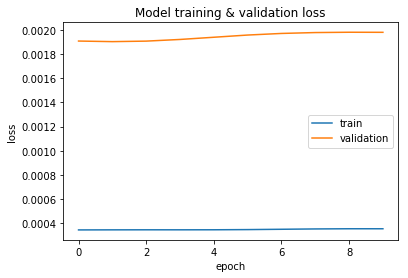

Test RMSE: 58.488
Test R2: 0.955
Test MSE: 3420.892
Test MAE: 27.033
Mean forcast error; MBE: -14.371
AbsDev: 0.122
Dimensions of split:  (229670, 1, 6) (229670,) (76555, 1, 6) (76555,)
Train on 229670 samples, validate on 76555 samples
Epoch 1/10
 - 6s - loss: 8.3497e-04 - rmse: 0.0094 - val_loss: 0.0023 - val_rmse: 0.0193
Epoch 2/10
 - 6s - loss: 8.3542e-04 - rmse: 0.0096 - val_loss: 0.0022 - val_rmse: 0.0190
Epoch 3/10
 - 6s - loss: 8.3581e-04 - rmse: 0.0096 - val_loss: 0.0022 - val_rmse: 0.0186
Epoch 4/10
 - 5s - loss: 8.3632e-04 - rmse: 0.0097 - val_loss: 0.0022 - val_rmse: 0.0182
Epoch 5/10
 - 5s - loss: 8.3665e-04 - rmse: 0.0098 - val_loss: 0.0022 - val_rmse: 0.0178
Epoch 6/10
 - 6s - loss: 8.3577e-04 - rmse: 0.0100 - val_loss: 0.0022 - val_rmse: 0.0174
Epoch 7/10
 - 6s - loss: 8.3452e-04 - rmse: 0.0100 - val_loss: 0.0022 - val_rmse: 0.0174
Epoch 8/10
 - 5s - loss: 8.3520e-04 - rmse: 0.0102 - val_loss: 0.0022 - val_rmse: 0.0175
Epoch 9/10
 - 6s - loss: 8.3603e-04 - rmse: 0.0103 

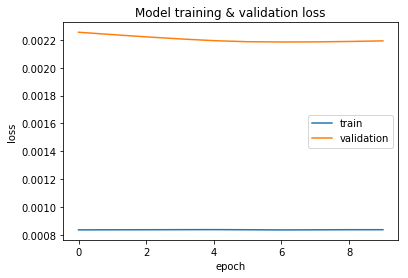

Test RMSE: 61.577
Test R2: 0.954
Test MSE: 3791.779
Test MAE: 23.588
Mean forcast error; MBE: 5.568
AbsDev: 0.101
Dimensions of split:  (306225, 1, 6) (306225,) (76555, 1, 6) (76555,)
Train on 306225 samples, validate on 76555 samples
Epoch 1/10
 - 8s - loss: 0.0012 - rmse: 0.0130 - val_loss: 0.0011 - val_rmse: 0.0154
Epoch 2/10
 - 8s - loss: 0.0012 - rmse: 0.0132 - val_loss: 0.0010 - val_rmse: 0.0149
Epoch 3/10
 - 8s - loss: 0.0012 - rmse: 0.0131 - val_loss: 0.0010 - val_rmse: 0.0147
Epoch 4/10
 - 8s - loss: 0.0012 - rmse: 0.0129 - val_loss: 0.0010 - val_rmse: 0.0145
Epoch 5/10
 - 8s - loss: 0.0012 - rmse: 0.0128 - val_loss: 0.0010 - val_rmse: 0.0142
Epoch 6/10
 - 8s - loss: 0.0012 - rmse: 0.0128 - val_loss: 0.0010 - val_rmse: 0.0141
Epoch 7/10
 - 8s - loss: 0.0012 - rmse: 0.0128 - val_loss: 0.0010 - val_rmse: 0.0140
Epoch 8/10
 - 8s - loss: 0.0012 - rmse: 0.0128 - val_loss: 0.0010 - val_rmse: 0.0140
Epoch 9/10
 - 9s - loss: 0.0012 - rmse: 0.0128 - val_loss: 0.0010 - val_rmse: 0.0139


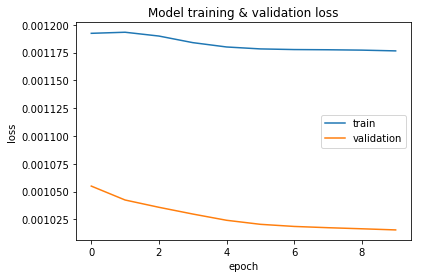

Test RMSE: 41.906
Test R2: 0.972
Test MSE: 1756.147
Test MAE: 18.313
Mean forcast error; MBE: -6.641
AbsDev: 0.098
Dimensions of split:  (382780, 1, 6) (382780,) (76555, 1, 6) (76555,)
Train on 382780 samples, validate on 76555 samples
Epoch 1/10
 - 10s - loss: 0.0011 - rmse: 0.0121 - val_loss: 2.5957e-04 - val_rmse: 0.0062
Epoch 2/10
 - 9s - loss: 0.0011 - rmse: 0.0121 - val_loss: 2.6205e-04 - val_rmse: 0.0065
Epoch 3/10
 - 10s - loss: 0.0011 - rmse: 0.0121 - val_loss: 2.6483e-04 - val_rmse: 0.0067
Epoch 4/10
 - 10s - loss: 0.0011 - rmse: 0.0121 - val_loss: 2.6818e-04 - val_rmse: 0.0071
Epoch 5/10
 - 10s - loss: 0.0011 - rmse: 0.0121 - val_loss: 2.7217e-04 - val_rmse: 0.0074
Epoch 6/10
 - 10s - loss: 0.0011 - rmse: 0.0121 - val_loss: 2.7669e-04 - val_rmse: 0.0078
Epoch 7/10
 - 11s - loss: 0.0011 - rmse: 0.0121 - val_loss: 2.8086e-04 - val_rmse: 0.0081
Epoch 8/10
 - 12s - loss: 0.0011 - rmse: 0.0121 - val_loss: 2.8394e-04 - val_rmse: 0.0084
Epoch 9/10
 - 10s - loss: 0.0011 - rmse: 0.01

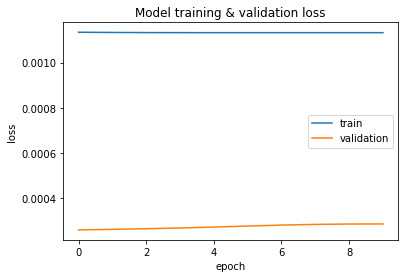

Test RMSE: 22.234
Test R2: 0.976
Test MSE: 494.358
Test MAE: 11.255
Mean forcast error; MBE: -8.895
AbsDev: 0.145
Dimensions of split:  (459335, 1, 6) (459335,) (76555, 1, 6) (76555,)
Train on 459335 samples, validate on 76555 samples
Epoch 1/10
 - 12s - loss: 9.9707e-04 - rmse: 0.0118 - val_loss: 7.9076e-05 - val_rmse: 0.0064
Epoch 2/10
 - 12s - loss: 0.0010 - rmse: 0.0121 - val_loss: 1.3006e-04 - val_rmse: 0.0072
Epoch 3/10
 - 13s - loss: 0.0010 - rmse: 0.0121 - val_loss: 1.2051e-04 - val_rmse: 0.0077
Epoch 4/10
 - 11s - loss: 9.9970e-04 - rmse: 0.0119 - val_loss: 1.3654e-04 - val_rmse: 0.0077
Epoch 5/10
 - 11s - loss: 9.9914e-04 - rmse: 0.0118 - val_loss: 1.4145e-04 - val_rmse: 0.0076
Epoch 6/10
 - 11s - loss: 9.9827e-04 - rmse: 0.0118 - val_loss: 1.4113e-04 - val_rmse: 0.0076
Epoch 7/10
 - 13s - loss: 9.9724e-04 - rmse: 0.0117 - val_loss: 1.3860e-04 - val_rmse: 0.0076
Epoch 8/10
 - 11s - loss: 9.9624e-04 - rmse: 0.0117 - val_loss: 1.3570e-04 - val_rmse: 0.0076
Epoch 9/10
 - 14s - l

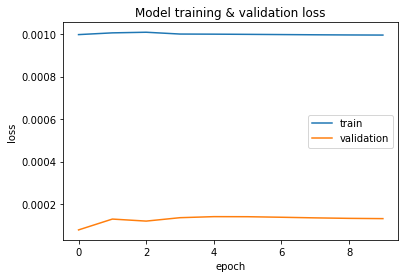

Test RMSE: 15.116
Test R2: 0.922
Test MSE: 228.495
Test MAE: 10.004
Mean forcast error; MBE: 0.097
AbsDev: 0.389
Dimensions of split:  (535890, 1, 6) (535890,) (76555, 1, 6) (76555,)
Train on 535890 samples, validate on 76555 samples
Epoch 1/10
 - 19s - loss: 8.5453e-04 - rmse: 0.0103 - val_loss: 1.3363e-04 - val_rmse: 0.0065
Epoch 2/10
 - 18s - loss: 8.5331e-04 - rmse: 0.0102 - val_loss: 1.3395e-04 - val_rmse: 0.0067
Epoch 3/10
 - 19s - loss: 8.5295e-04 - rmse: 0.0102 - val_loss: 1.3445e-04 - val_rmse: 0.0069
Epoch 4/10
 - 19s - loss: 8.5300e-04 - rmse: 0.0103 - val_loss: 1.3293e-04 - val_rmse: 0.0069
Epoch 5/10
 - 19s - loss: 8.5375e-04 - rmse: 0.0103 - val_loss: 1.3355e-04 - val_rmse: 0.0070
Epoch 6/10
 - 17s - loss: 8.5520e-04 - rmse: 0.0104 - val_loss: 1.3808e-04 - val_rmse: 0.0075
Epoch 7/10
 - 18s - loss: 8.5738e-04 - rmse: 0.0105 - val_loss: 1.4941e-04 - val_rmse: 0.0083
Epoch 8/10
 - 17s - loss: 8.5944e-04 - rmse: 0.0107 - val_loss: 1.6209e-04 - val_rmse: 0.0091
Epoch 9/10
 - 

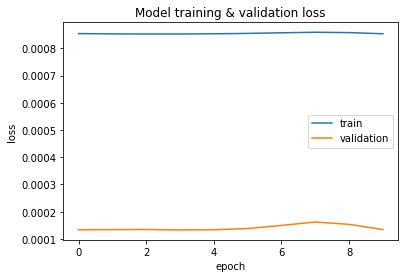

Test RMSE: 15.245
Test R2: 0.970
Test MSE: 232.399
Test MAE: 9.823
Mean forcast error; MBE: 8.309
AbsDev: 0.218
Dimensions of split:  (612445, 1, 6) (612445,) (76555, 1, 6) (76555,)
Train on 612445 samples, validate on 76555 samples
Epoch 1/10
 - 18s - loss: 7.5770e-04 - rmse: 0.0093 - val_loss: 5.2046e-04 - val_rmse: 0.0071
Epoch 2/10
 - 18s - loss: 7.5777e-04 - rmse: 0.0093 - val_loss: 5.2314e-04 - val_rmse: 0.0072
Epoch 3/10
 - 18s - loss: 7.5656e-04 - rmse: 0.0092 - val_loss: 5.2742e-04 - val_rmse: 0.0075
Epoch 4/10
 - 17s - loss: 7.5551e-04 - rmse: 0.0092 - val_loss: 5.3094e-04 - val_rmse: 0.0078
Epoch 5/10
 - 17s - loss: 7.5508e-04 - rmse: 0.0091 - val_loss: 5.3425e-04 - val_rmse: 0.0080
Epoch 6/10
 - 17s - loss: 7.5498e-04 - rmse: 0.0092 - val_loss: 5.3812e-04 - val_rmse: 0.0083
Epoch 7/10
 - 18s - loss: 7.5502e-04 - rmse: 0.0092 - val_loss: 5.4272e-04 - val_rmse: 0.0086
Epoch 8/10
 - 17s - loss: 7.5513e-04 - rmse: 0.0092 - val_loss: 5.4809e-04 - val_rmse: 0.0090
Epoch 9/10
 - 1

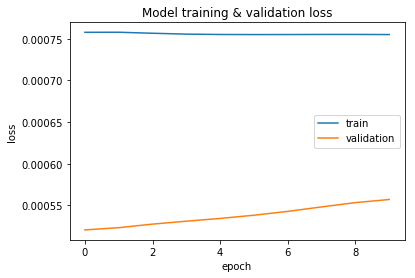

Test RMSE: 31.035
Test R2: 0.974
Test MSE: 963.168
Test MAE: 12.555
Mean forcast error; MBE: 7.491
AbsDev: 0.104
Dimensions of split:  (689000, 1, 6) (689000,) (76555, 1, 6) (76555,)
Train on 689000 samples, validate on 76555 samples
Epoch 1/10
 - 22s - loss: 7.3221e-04 - rmse: 0.0093 - val_loss: 0.0024 - val_rmse: 0.0297
Epoch 2/10
 - 22s - loss: 7.6507e-04 - rmse: 0.0110 - val_loss: 0.0023 - val_rmse: 0.0280
Epoch 3/10
 - 23s - loss: 7.3923e-04 - rmse: 0.0098 - val_loss: 0.0023 - val_rmse: 0.0273
Epoch 4/10
 - 22s - loss: 7.3798e-04 - rmse: 0.0097 - val_loss: 0.0023 - val_rmse: 0.0277
Epoch 5/10
 - 22s - loss: 7.3676e-04 - rmse: 0.0096 - val_loss: 0.0023 - val_rmse: 0.0275
Epoch 6/10
 - 22s - loss: 7.3570e-04 - rmse: 0.0095 - val_loss: 0.0023 - val_rmse: 0.0273
Epoch 7/10
 - 23s - loss: 7.3488e-04 - rmse: 0.0095 - val_loss: 0.0023 - val_rmse: 0.0270
Epoch 8/10
 - 23s - loss: 7.3424e-04 - rmse: 0.0094 - val_loss: 0.0022 - val_rmse: 0.0267
Epoch 9/10
 - 23s - loss: 7.3375e-04 - rmse: 0

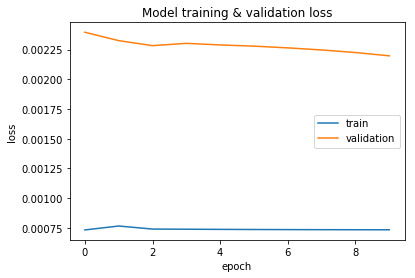

Test RMSE: 61.648
Test R2: 0.953
Test MSE: 3800.504
Test MAE: 33.592
Mean forcast error; MBE: -16.941
AbsDev: 0.146
Dimensions of split:  (765555, 1, 6) (765555,) (76555, 1, 6) (76555,)
Train on 765555 samples, validate on 76555 samples
Epoch 1/10
 - 25s - loss: 8.6429e-04 - rmse: 0.0103 - val_loss: 0.0025 - val_rmse: 0.0219
Epoch 2/10
 - 25s - loss: 8.6324e-04 - rmse: 0.0103 - val_loss: 0.0025 - val_rmse: 0.0216
Epoch 3/10
 - 26s - loss: 8.6222e-04 - rmse: 0.0102 - val_loss: 0.0025 - val_rmse: 0.0214
Epoch 4/10
 - 26s - loss: 8.6133e-04 - rmse: 0.0102 - val_loss: 0.0025 - val_rmse: 0.0211
Epoch 5/10
 - 25s - loss: 8.6048e-04 - rmse: 0.0102 - val_loss: 0.0025 - val_rmse: 0.0209
Epoch 6/10
 - 26s - loss: 8.5976e-04 - rmse: 0.0102 - val_loss: 0.0025 - val_rmse: 0.0208
Epoch 7/10
 - 26s - loss: 8.5917e-04 - rmse: 0.0102 - val_loss: 0.0025 - val_rmse: 0.0208
Epoch 8/10
 - 26s - loss: 8.5873e-04 - rmse: 0.0102 - val_loss: 0.0025 - val_rmse: 0.0210
Epoch 9/10
 - 27s - loss: 8.5858e-04 - rmse

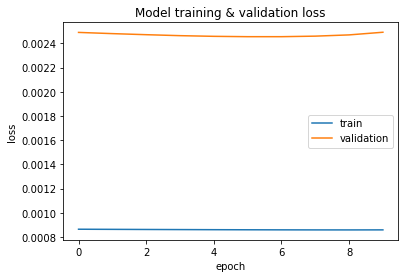

Test RMSE: 65.644
Test R2: 0.940
Test MSE: 4309.095
Test MAE: 29.707
Mean forcast error; MBE: -11.860
AbsDev: 0.140
Mean:  40.65680261413546  std:  18.976362585760306
Mean:  0.9587066381664604  std:  0.01667597557786016
Mean:  2013.0779  std:  1556.1353
Mean:  18.74949  std:  8.567687


In [21]:
# config
#batch_n = 1000
epoch_n = 10
lr_n = 0.01
neurons_n = 75
x= 5 #number of features

from keras import backend
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

dataset=traindev
df2 = dataset.drop('Short-wave downward (GLOBAL) radiation [W/m**2]',1)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

# split into train and test sets
# total = 1052639
values=scaled
n_train_hours = int(842111*0.80)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

selection = SelectKBest(k=x)
X_new = selection.fit_transform(train_X, train_y)
print(X_new.shape)
indexes = selection.get_support(indices=True)
print(indexes)

goodlist=[]
goodlist.append('Short-wave downward (GLOBAL) radiation [W/m**2]')
for i in list(df2[indexes]):
    goodlist.append(i)
reduceddf = dataset[goodlist]
print("Shape of reduced: ",reduceddf.shape)

values = reduceddf.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
remove = range(x+2, x*2+2)
removelist=[]
for p in remove:
    removelist.append(p)
reframed.drop(reframed.columns[removelist], axis=1, inplace=True)
print(list(reframed))

# split into train and test sets
# total = 1052639
values = reframed.values
X, Y = values[:, :-1], values[:, -1]



keeptrack_rmse=[]
keeptrack_rmsestd=[]
keeptrack_trainrmse=[]
keeptrack_trainrmsestd=[]


#-----------Cross-Validation--------------------------------------

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# define cross validation method
kfold = TimeSeriesSplit(n_splits=10)
cvscores = []
cvscorestrain=[]
cvscoresr2=[]
cvscoresmse=[]
cvscoresmae=[]
for train, test in kfold.split(X, Y):
    train_X, test_X = X[train], X[test]
    train_y, test_y = Y[train], Y[test]

    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print("Dimensions of split: ",train_X.shape, train_y.shape, test_X.shape, test_y.shape)

     # design network
    model = Sequential()
    model.add(LSTM(neurons_n, input_shape=(train_X.shape[1], train_X.shape[2]), kernel_initializer='uniform'))
    model.add(Dense(1))
    model.add(Activation('linear'))
    adam=keras.optimizers.Adam(lr=lr_n)
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])

    # Fit the model
    model.fit(train_X, train_y, epochs=epoch_n, batch_size=batch_n,validation_data=(test_X, test_y), verbose=0, shuffle=False)
    
    history = model.fit(train_X, train_y, epochs=epoch_n, batch_size=batch_n, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.title('Model training & validation loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend()
    pyplot.show()
    
    # make a prediction
    yhat = model.predict(test_X)
    yhatrain = model.predict(train_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    inv_yhatrain = concatenate((yhatrain, train_X[:, 1:]), axis=1)
    inv_yhatrain = scaler.inverse_transform(inv_yhatrain)
    inv_yhatrain = inv_yhatrain[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    train_y = train_y.reshape((len(train_y), 1))
    inv_ytrain = concatenate((train_y, train_X[:, 1:]), axis=1)
    inv_ytrain = scaler.inverse_transform(inv_ytrain)
    inv_ytrain = inv_ytrain[:,0]
    # model evaluation
    testrmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    trainrmse = sqrt(mean_squared_error(inv_ytrain, inv_yhatrain))
    print('Test RMSE: %.3f' % testrmse)
    # calculate Rsqured
    r2test=r2_score(inv_y, inv_yhat)
    print('Test R2: %.3f' % r2test)
    # calculate mse
    msetest = mean_squared_error(inv_y, inv_yhat)
    print('Test MSE: %.3f' % msetest)
    # mean absolute error
    maetest = metrics.mean_absolute_error(inv_y, inv_yhat)
    print('Test MAE: %.3f' % maetest)
    # Mean Forecast Error (or Residual Forecast Error)
    forecast_errorstest = [inv_y[i]-inv_yhat[i] for i in range(len(inv_y))]
    biastest = sum(forecast_errorstest) * 1.0/len(inv_y)
    print('Mean forcast error; MBE: %.3f' % biastest)
    absdevtest=(1/sum(inv_y))* sum(numpy.abs(inv_yhat - inv_y))
    print('AbsDev: %.3f' % absdevtest)
    cvscores.append(testrmse)
    cvscorestrain.append(trainrmse)
    cvscoresr2.append(r2test)
    cvscoresmse.append(msetest)
    cvscoresmae.append(maetest)
print("Mean: " ,numpy.mean(cvscores), " std: ",numpy.std(cvscores))
print("Mean: " ,numpy.mean(cvscoresr2), " std: ",numpy.std(cvscoresr2))
print("Mean: " ,numpy.mean(cvscoresmse), " std: ",numpy.std(cvscoresmse))
print("Mean: " ,numpy.mean(cvscoresmae), " std: ",numpy.std(cvscoresmae))
#-------------------------------------------------------------------------

The model is underfitting for some splits.
- split 1: ok
- split 2: ok
- split 3: ok
- split 4: not ok, Dimensions of split:  (306225, 1, 6) (306225,) (76555, 1, 6) (76555,)
- split 5: not ok, Dimensions of split:  (382780, 1, 6) (382780,) (76555, 1, 6) (76555,)
- split 6: not ok, Dimensions of split:  (459335, 1, 6) (459335,) (76555, 1, 6) (76555,)
- split 7: not ok, Dimensions of split:  (535890, 1, 6) (535890,) (76555, 1, 6) (76555,)
- split 8: not ok, Dimensions of split:  (612445, 1, 6) (612445,) (76555, 1, 6) (76555,)
- split 9: ok
- split 10: ok

# Using test set (RealTestSet)

Original dataset (1052640, 26)
['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var1(t)']
(842111, 1, 6) (842111,) (210528, 1, 6) (210528,)
Train on 842111 samples, validate on 210528 samples
Epoch 1/10
 - 36s - loss: 0.0021 - rmse: 0.0231 - val_loss: 4.7814e-04 - val_rmse: 0.0076
Epoch 2/10
 - 27s - loss: 0.0010 - rmse: 0.0105 - val_loss: 4.7324e-04 - val_rmse: 0.0078
Epoch 3/10
 - 26s - loss: 0.0010 - rmse: 0.0104 - val_loss: 4.9548e-04 - val_rmse: 0.0092
Epoch 4/10
 - 26s - loss: 0.0010 - rmse: 0.0116 - val_loss: 4.7332e-04 - val_rmse: 0.0077
Epoch 5/10
 - 28s - loss: 0.0010 - rmse: 0.0120 - val_loss: 4.9296e-04 - val_rmse: 0.0091
Epoch 6/10
 - 26s - loss: 0.0010 - rmse: 0.0121 - val_loss: 4.5693e-04 - val_rmse: 0.0070
Epoch 7/10
 - 25s - loss: 0.0010 - rmse: 0.0116 - val_loss: 5.1129e-04 - val_rmse: 0.0102
Epoch 8/10
 - 26s - loss: 0.0010 - rmse: 0.0117 - val_loss: 4.7981e-04 - val_rmse: 0.0087
Epoch 9/10
 - 26s - loss: 0.0010 - rmse: 0.0115 - val_los

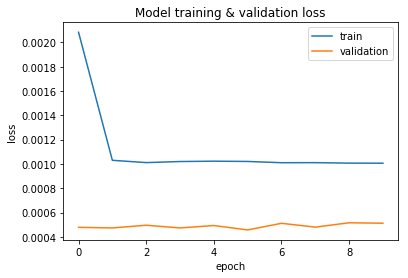

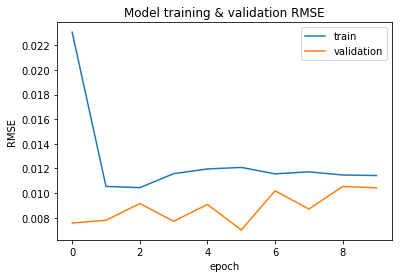

Model Evaluation scores:
Test RMSE: 29.756
Test R2: 0.970
Test MSE: 885.430
Test MAE: 13.718
Mean forcast error; MBE: -6.813
AbsDev: 0.154


In [50]:
# config
batch_n = 1000
epoch_n = 10
lr_n = 0.01
neurons_n = 75

from keras import backend
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))


dataset = pd.read_csv('RNNtry.csv', header=0, index_col=0)
dataset=dataset.drop('IIiii',1)
print("Original dataset",dataset.shape)
dataset= dataset[['Short-wave downward (GLOBAL) radiation [W/m**2]','Humidity, relative [%]', 'Dew/frost point [deg C].1', 'Station Pressure [hPa]', 'Month_Number', 'Day_Number']]
#----------------------Now-5-features-left--------------------------
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
remove = range(5+2, 5*2+2)
removelist=[]
for p in remove:
    removelist.append(p)
reframed.drop(reframed.columns[removelist], axis=1, inplace=True)
print(list(reframed))

# split into train and test sets
values = reframed.values
n_train_hours = int(1052639*0.80)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(neurons_n, input_shape=(train_X.shape[1], train_X.shape[2]), kernel_initializer='uniform'))
model.add(Dense(1))
model.add(Activation('linear'))
adam=keras.optimizers.Adam(lr=lr_n)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])

# fit network
#callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')]
history = model.fit(train_X, train_y, epochs=epoch_n, batch_size=batch_n, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.title('Model training & validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend()
pyplot.show()

#plot rmse
pyplot.plot(history.history['rmse'], label='train')
pyplot.plot(history.history['val_rmse'], label='validation')
pyplot.title('Model training & validation RMSE')
pyplot.ylabel('RMSE')
pyplot.xlabel('epoch')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
yhatrain = model.predict(train_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# model evaluation
from sklearn import metrics
print("Model Evaluation scores:")
# calculate RMSE
testrmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % testrmse)
# calculate Rsqured
r2=r2_score(inv_y, inv_yhat)
print('Test R2: %.3f' % r2)
# calculate mse
mse = mean_squared_error(inv_y, inv_yhat)
print('Test MSE: %.3f' % mse)
# mean absolute error
mae = metrics.mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)
# Mean Forecast Error (or Residual Forecast Error)
forecast_errors = [inv_y[i]-inv_yhat[i] for i in range(len(inv_y))]
bias = sum(forecast_errors) * 1.0/len(inv_y)
print('Mean forcast error; MBE: %.3f' % bias)
absdev=(1/sum(inv_y))* sum(numpy.abs(inv_yhat - inv_y))
print('AbsDev: %.3f' % absdev)

# Plot PSD

In [51]:
real = inv_y
predicted = inv_yhat

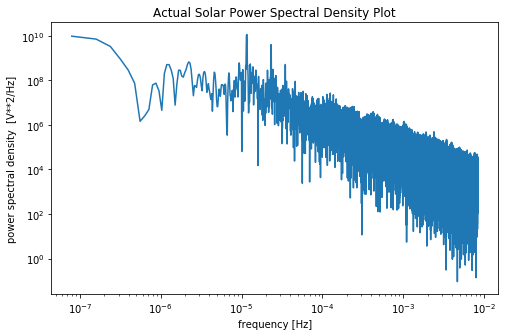

In [52]:
from scipy import signal
import matplotlib.pyplot as plt
fs = 1/60
f, Pxx_denreal = signal.periodogram(real, fs, 'flattop')
plt.figure(figsize=(8, 5))
plt.loglog(f, Pxx_denreal)
#plt.ylim([0, 10e8])
#plt.xlim([10e-6, 10e-2])
plt.xlabel('frequency [Hz]')
plt.ylabel('power spectral density  [V**2/Hz]')
plt.title('Actual Solar Power Spectral Density Plot')
plt.show()

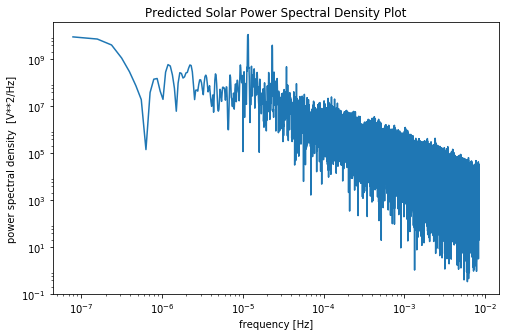

In [53]:
from scipy import signal
import matplotlib.pyplot as plt
fs = 1/60
f2, Pxx_denpred = signal.periodogram(predicted, fs, 'flattop')
plt.figure(figsize=(8, 5))
plt.loglog(f2, Pxx_denpred)
#plt.ylim([0, 10e8])
#plt.xlim([10e-6, 10e-2])
plt.xlabel('frequency [Hz]')
plt.ylabel('power spectral density  [V**2/Hz]')
plt.title('Predicted Solar Power Spectral Density Plot')
plt.show()

In [54]:
diff1=[]
for i in range(0, len(Pxx_denreal)):
    result = abs(Pxx_denreal[i]-Pxx_denpred[i])
    diff1.append(result)

In [55]:
print(diff1[0])
print(diff1[-1])

443538430.0
143.82153


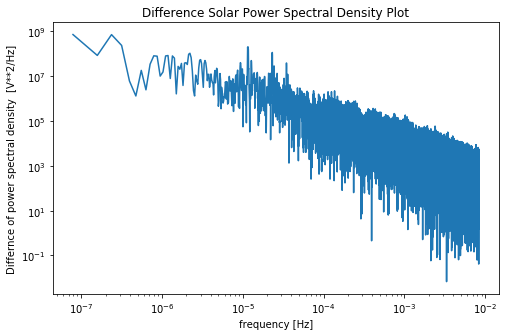

In [56]:
plt.figure(figsize=(8, 5))
plt.loglog(f,(diff1))
plt.xlabel('frequency [Hz]')
plt.ylabel('Differnce of power spectral density  [V**2/Hz]')
plt.title('Difference Solar Power Spectral Density Plot')
plt.show()